In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_results.csv')
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,total_requests,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM
0,0.795580,2023,2,28,138.791667,57.111111,37,1,1,False,...,181,3,5,6,1,60,100,900,900,1000
1,0.847134,2023,2,25,120.654135,34.007519,24,1,1,False,...,157,3,5,6,1,60,100,900,900,1000
2,0.762557,2023,2,27,134.802395,52.017964,52,1,1,False,...,219,3,5,6,1,60,100,900,900,1000
3,0.917910,2023,2,26,120.439024,21.691057,11,1,1,False,...,134,3,5,6,1,60,100,900,900,1000
4,1.000000,2023,2,26,576.992537,18.783582,0,2,1,False,...,134,3,5,6,6,60,100,900,900,1000
5,0.993631,2023,2,25,588.666667,45.147436,1,2,1,False,...,157,3,5,6,6,60,100,900,900,1000
6,0.955801,2023,2,28,634.786127,86.566474,8,2,1,False,...,181,3,5,6,6,60,100,900,900,1000
7,0.972603,2023,2,27,663.089202,116.469484,6,2,1,False,...,219,3,5,6,6,60,100,900,900,1000
8,1.000000,2023,2,26,545.298507,12.492537,0,2,1,True,...,134,3,5,6,6,60,100,900,900,1000
9,1.000000,2023,2,26,578.820896,15.507463,0,2,1,True,...,134,3,5,6,6,60,100,900,900,1000


In [6]:
df['combined'] = df.apply(lambda row: f"{row['mode']}_{row['cost_mode']}_{row['IMPERFECT_GENERATIVE_MODEL']}_{row['BETTER_GEN_MODEL']}", axis=1)


mapping = {'1_1_False_False': 'greedy',
 '2_1_False_False': 'perfect',
 '2_1_True_True': 'imperfect_ours',
 '2_1_True_False': 'imperfect_baseline',
 }


# Rename the values in the 'combined' column based on the mapping
df['combined'] = df['combined'].map(mapping)
df = df.sort_values(by='combined')
# Display the DataFrame to verify the changes
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM,combined
0,0.795580,2023,2,28,138.791667,57.111111,37,1,1,False,...,3,5,6,1,60,100,900,900,1000,greedy
1,0.847134,2023,2,25,120.654135,34.007519,24,1,1,False,...,3,5,6,1,60,100,900,900,1000,greedy
2,0.762557,2023,2,27,134.802395,52.017964,52,1,1,False,...,3,5,6,1,60,100,900,900,1000,greedy
3,0.917910,2023,2,26,120.439024,21.691057,11,1,1,False,...,3,5,6,1,60,100,900,900,1000,greedy
8,1.000000,2023,2,26,545.298507,12.492537,0,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_baseline
10,0.980892,2023,2,25,577.824675,44.084416,3,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_baseline
13,0.944751,2023,2,28,609.947368,118.105263,10,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_baseline
14,0.968037,2023,2,27,654.707547,165.386792,7,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_baseline
9,1.000000,2023,2,26,578.820896,15.507463,0,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_ours
11,0.993631,2023,2,25,577.666667,64.564103,1,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_ours


In [7]:
new_df = df.groupby('combined').median()
new_df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,total_requests,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM
combined,,,,,,,,,,,,,,,,,,,,,
greedy,0.821357,2023.0,2.0,26.5,127.728265,43.012741,30.5,1.0,1.0,0.0,...,169.0,3.0,5.0,6.0,1.0,60.0,100.0,900.0,900.0,1000.0
imperfect_baseline,0.974464,2023.0,2.0,26.5,593.886022,81.094839,5.0,2.0,1.0,1.0,...,169.0,3.0,5.0,6.0,6.0,60.0,100.0,900.0,900.0,1000.0
imperfect_ours,0.978550,2023.0,2.0,26.5,605.195742,100.199698,4.5,2.0,1.0,1.0,...,169.0,3.0,5.0,6.0,6.0,60.0,100.0,900.0,900.0,1000.0
perfect,0.983117,2023.0,2.0,26.5,611.726397,65.856955,3.5,2.0,1.0,0.0,...,169.0,3.0,5.0,6.0,6.0,60.0,100.0,900.0,900.0,1000.0


In [8]:
grouped_df = df.groupby(['combined']).median().reset_index()
pivot_df = grouped_df.pivot(index=column, columns='combined', values='serviced ratio')
pivot_df['baseline_improvement'] = ((pivot_df['imperfect_ours'] / pivot_df['imperfect_baseline']) - 1)

o = pivot_df['imperfect_ours']
t = pivot_df['imperfect_baseline']
p = pivot_df['perfect']
pivot_df['theoretical maxiumum'] = (o-t)/(p-t) 
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x < 0 else x)
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x > 1 else x)

final_table = pivot_df[['imperfect_baseline', 'imperfect_ours', 'perfect', 'baseline_improvement', 'theoretical maxiumum']]

# Function to format floats to 4 significant figures
def format_float(x):
    return f"{100*x:.4g}" if isinstance(x, (float, np.floating)) else x

# Apply the formatting function to the entire DataFrame
final_table = final_table.applymap(format_float)

# Convert to LaTeX table
latex_table = final_table.to_latex(index=False, escape=False)

# Save the LaTeX table to a file
with open('table.tex', 'a') as f:
    f.write(latex_table)

final_table

NameError: name 'column' is not defined

/tmp/ipykernel_3866595/534707454.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='combined', y='serviced ratio', data=df, ax=ax1, palette=palette)
/tmp/ipykernel_3866595/534707454.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='combined', y='serviced ratio', data=df_filtered, ax=ax2, palette=palette[1:])


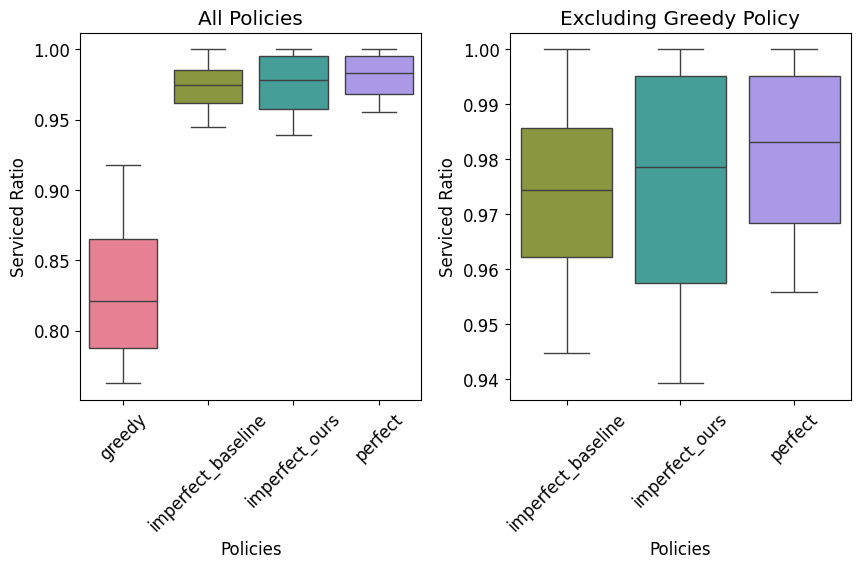

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Set the font size
plt.rcParams.update({'font.size': 12})

# Calculate figure size
a4_length_mm = 297
half_a4_length_mm = a4_length_mm / 2
half_a4_length_inches = half_a4_length_mm / 25.4  # Convert mm to inches
figure_width = half_a4_length_inches * 1.5  # Double the width to accommodate two plots

# Define a color palette
palette = sns.color_palette("husl", 4)

# Create two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(figure_width, half_a4_length_inches))

# Group by 'combined' and calculate the median
new_df = df.groupby('combined').median()
improvement = new_df.loc['imperfect_ours'] / new_df.loc['imperfect_baseline']

# Create boxplot for all policies (including greedy)
sns.boxplot(x='combined', y='serviced ratio', data=df, ax=ax1, palette=palette)
ax1.set_ylabel('Serviced Ratio')
ax1.set_xlabel('Policies')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('All Policies')

# Filter out the greedy algorithm
df_filtered = df[df['combined'] != 'greedy']

# Create boxplot for policies excluding greedy
sns.boxplot(x='combined', y='serviced ratio', data=df_filtered, ax=ax2, palette=palette[1:])
ax2.set_ylabel('Serviced Ratio')
ax2.set_xlabel('Policies')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Excluding Greedy Policy')

# Adjust layout
plt.tight_layout()

# Save the figure with DPI 300
plt.savefig('/home/igorsadalski/Desktop/igor_master_theis/final_results/main_results_plots_dual_view.png', dpi=300, bbox_inches='tight')
plt.show()

# TODO: add theoretical maximal improvement possible